In [1]:
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D,MaxPooling2D,Dropout,Flatten,Conv2D,Activation

Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Conv2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [5]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

In [6]:
from keras import Model

In [7]:
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [8]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 


In [9]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [10]:
epsilon = 0.40 #cosine similarity
#epsilon = 120 #euclidean distance
 
def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(img1)[0,:]
    img2_representation = vgg_face_descriptor.predict(img2)[0,:]
 
    cosine_similarity = findCosineDistance(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
 
    if(cosine_similarity < epsilon):
        return (1,cosine_similarity);
    
    else:
        return (0,cosine_similarity);
        

In [11]:
import cv2

In [21]:
img1 = cv2.imread("img1.jpg")
img1 = cv2.resize(img1,(224,224))

In [22]:
import matplotlib.pyplot as plt

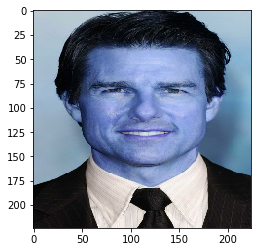

In [23]:
plt.imshow(img1)

In [24]:
#img2 = cv2.imread("img2.jpg")
#img2 = cv2.resize(img2,(224,224))

In [25]:
img1 = img1/255
#img2 = img2/255

In [26]:
img1 = img1.reshape(1,224,224,3)

In [27]:
#img2 = img2.reshape(1,224,224,3)

In [28]:
#verifyFace(img1,img2)

In [30]:
import cv2
import numpy as np
import os 
recognizer = cv2.face.LBPHFaceRecognizer_create()
cascadePath = "haarcascade_frontalface_default.xml"

# C
faceCascade = cv2.CascadeClassifier(cascadePath);

# Set the font style
font = cv2.FONT_HERSHEY_SIMPLEX

# Initialize and start the video frame capture
cam = cv2.VideoCapture(0)

# Loop
while True:
    # Read the video frame
    ret, im =cam.read()

    # Convert the captured frame into grayscale
    #gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    #gray = cv2.resize(im,(224,224))
    #gray = gray.reshape(1,224,224,3)                  

    # Get all face from the video frame
    faces = faceCascade.detectMultiScale(im, 1.2,5)

    # For each face in faces
    for(x,y,w,h) in faces:

        # Create rectangle around the face
        cv2.rectangle(im, (x-20,y-20), (x+w+20,y+h+10), (255,0,0), 3)
        img2 = im[y:y+h,x:x+w]
        img2 = cv2.resize(img2,(224,224))
        img2 = img2.reshape(1,224,224,3)

        # Recognize the face belongs to which ID
        out,dist  = verifyFace(img1,img2)
        if(out == 1):
            cv2.putText(im,"True",(x,y+h+40),font, 0.8, (255,0,0), 2)
            cv2.putText(im,str(dist),(x,y+h+70),font, 0.8, (255,0,0), 2)
        else:
            cv2.putText(im,"FALSE",(x,y+h+40),font, 0.8, (0,0,255), 2)
            cv2.putText(im,str(dist),(x,y+h+70),font, 0.8, (0,0,255), 2)
        
    # Display the video frame with the bounded rectangle
    cv2.imshow('im',im) 

    # If 'q' is pressed, close program
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Stop the camera
cam.release()

# Close all windows
cv2.destroyAllWindows()